In [2]:
import numpy
numpy.version.full_version

'1.14.3'

In [3]:
import numpy as np
a = np.array([0,1,2,3,4,5])
a

array([0, 1, 2, 3, 4, 5])

In [4]:
a.ndim

1

In [5]:
a.shape


(6,)

In [6]:
b=a.reshape((3,2))

In [5]:
b

array([[0, 1],
       [2, 3],
       [4, 5]])

In [7]:
b.ndim

2

In [8]:
b.shape

(3, 2)

In [9]:
b[1][0]=77
b

array([[ 0,  1],
       [77,  3],
       [ 4,  5]])

In [10]:
a

array([ 0,  1, 77,  3,  4,  5])

In [11]:
c=a.reshape((3,2)).copy()
c

array([[ 0,  1],
       [77,  3],
       [ 4,  5]])

In [12]:
c[0][0]=-99
a

array([ 0,  1, 77,  3,  4,  5])

In [13]:
c

array([[-99,   1],
       [ 77,   3],
       [  4,   5]])

In [14]:
d=np.array([1,2,3,4,5])
d*2

array([ 2,  4,  6,  8, 10])

In [15]:
d**2

array([ 1,  4,  9, 16, 25], dtype=int32)

In [16]:
[1,2,3,4,5]*2

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [17]:
[1,2,3,4,5]**2

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [18]:
a[np.array([2,3,4])]

array([77,  3,  4])

In [19]:
a>4

array([False, False,  True, False, False,  True])

In [20]:
a[a>4]

array([77,  5])

In [21]:
a[a>4]=4
a

array([0, 1, 4, 3, 4, 4])

In [22]:
a.clip(0,4)

array([0, 1, 4, 3, 4, 4])

In [23]:
c=np.array([1,2,np.NAN,3,4])
c

array([ 1.,  2., nan,  3.,  4.])

In [24]:
np.isnan(c)

array([False, False,  True, False, False])

In [25]:
c[~np.isnan(c)]

array([1., 2., 3., 4.])

In [26]:
np.mean(c[~np.isnan(c)])

2.5

In [30]:
import timeit
normal_py_sec=timeit.timeit('sum(x*x for x in range(1000))',
                            number=10000)
naive_np_sec=timeit.timeit(
    'sum(na*na)',
    setup="import numpy as np; na=np.arange(1000)",
    number=10000)
good_np_sec=timeit.timeit('na.dot(na)',
                          setup="import numpy as np; na=np.arange(1000)",
                          number=10000)
print("Normal Python: %f sec"%normal_py_sec)
print("Naive NumPy: %f sec"%naive_np_sec)
print("Good Python: %f sec"%good_np_sec)

Normal Python: 0.925518 sec
Naive NumPy: 0.838691 sec
Good Python: 0.012286 sec


In [31]:
a=np.array([1,2,3])
a.dtype

dtype('int32')

In [32]:
np.array([1,"stringy"])

array(['1', 'stringy'], dtype='<U11')

In [33]:
np.array([1,"stringy",set([1,2,3])])

array([1, 'stringy', {1, 2, 3}], dtype=object)

In [3]:
import scipy, numpy
scipy.version.full_version

'1.1.0'

In [4]:
scipy.dot is numpy.dot

True

In [5]:
import scipy as sp
data = sp.genfromtxt("web_traffic.tsv",delimiter="\t")
print(data[:10])

[[1.000e+00 2.272e+03]
 [2.000e+00       nan]
 [3.000e+00 1.386e+03]
 [4.000e+00 1.365e+03]
 [5.000e+00 1.488e+03]
 [6.000e+00 1.337e+03]
 [7.000e+00 1.883e+03]
 [8.000e+00 2.283e+03]
 [9.000e+00 1.335e+03]
 [1.000e+01 1.025e+03]]


In [6]:
print(data.shape)

(743, 2)


In [7]:
x=data[:,0]
y=data[:,1]
sp.sum(sp.isnan(y))

8

In [8]:
x=x[~sp.isnan(y)]

In [9]:
y=y[~sp.isnan(y)]

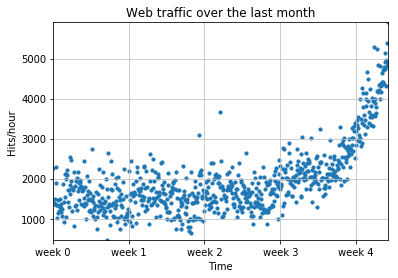

In [13]:
import matplotlib.pyplot as plt
#plit the (x,y) point with dots of size 10
plt.scatter(x, y, s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range (10)],
          ['week %i' %w for w in range(10)])
plt.autoscale(tight=True)
plt.grid(True,linestyle='-', color='0.75')
plt.show()

In [14]:
def error(f,x,y):
    return sp.sum((f(x)-y)**2)

In [15]:
fpl, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full=True)

In [16]:
print("Model parameters: %s" % fpl)

Model parameters: [  2.59619213 989.02487106]


In [17]:
print(residuals)

[3.17389767e+08]


In [18]:
f1 = sp.poly1d(fpl)
print(error(f1, x, y))

317389767.33977807


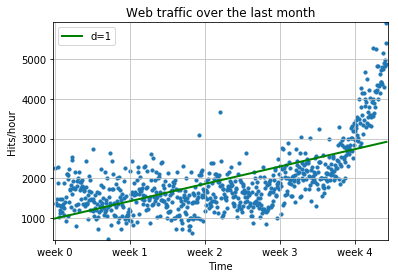

In [19]:
import matplotlib.pyplot as plt
fx = sp.linspace(0,x[-1], 1000)
plt.plot(fx, f1(fx), linewidth=2,color='green')
plt.legend(["d=%i" % f1.order], loc="upper left")
plt.scatter(x,y,s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-',color='0.75')
plt.show()

In [20]:
f2p = sp.polyfit(x,y,2)
print(f2p)

[ 1.05322215e-02 -5.26545650e+00  1.97476082e+03]


In [21]:
f2 = sp.poly1d(f2p)
print(error(f2,x,y))

179983507.8781792


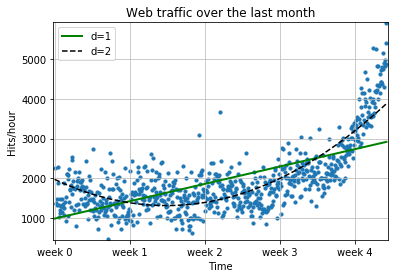

In [43]:
import matplotlib.pyplot as plt
fx = sp.linspace(0,x[-1], 1000)
plt.plot(fx, f1(fx), linewidth=2,color='green',label='d=1')
plt.scatter(x,y,s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-',color='0.75')
fx = sp.linspace(0,x[-1], 1000)
plt.plot(fx, f2(fx), 'k--',color='black', label='d=2')
legend = plt.legend(loc='upper left')
plt.show()

In [34]:
f3p = sp.polyfit(x,y,3)
f3 = sp.poly1d(f3p)
print(error(f3,x,y))

139350144.03172523


In [44]:
f10p = sp.polyfit(x,y,10)
f10 = sp.poly1d(f10p)
print(error(f10,x,y))

121942326.36354844


In [36]:
f10p = sp.polyfit(x,y,10)
f10 = sp.poly1d(f10p)
print(error(f10,x,y))

121942326.36354844


In [45]:
f53p = sp.polyfit(x,y,53)
f53 = sp.poly1d(f53p)
print(error(f53,x,y))

109452415.02554622


C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


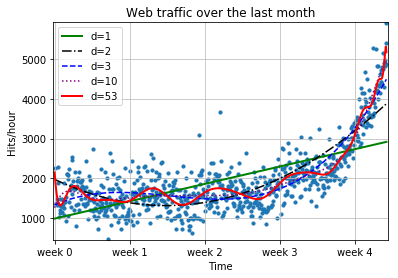

In [51]:
import matplotlib.pyplot as plt
fx = sp.linspace(0,x[-1], 1000)
plt.plot(fx, f1(fx), linewidth=2,color='green',label='d=1')
plt.scatter(x,y,s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-',color='0.75')
fx = sp.linspace(0,x[-1], 1000)
plt.plot(fx, f2(fx), '-.',color='black', label='d=2')
fx = sp.linspace(0,x[-1], 1000)
plt.plot(fx, f3(fx), '--',color='blue', label='d=3')
fx = sp.linspace(0,x[-1], 1000)
plt.plot(fx, f10(fx), 'k:',color='purple', label='d=10')
fx = sp.linspace(0,x[-1], 1000)
plt.plot(fx, f53(fx), linewidth=2,color='red', label='d=53')
legend = plt.legend(loc='upper left')
plt.show()

In [59]:
inflection = 3.5*7*24 
inflection=int(inflection)
xa = x[:inflection] 
ya = y[:inflection]
xb = x[inflection:] 
yb = y[inflection:]
fa = sp.poly1d(sp.polyfit(xa, ya, 1))
fb = sp.poly1d(sp.polyfit(xb, yb, 1))
fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)
print("Error inflection=%f" % (fa_error + fb_error))

Error inflection=132950348.197616


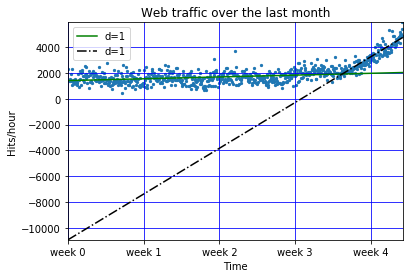

In [67]:
import matplotlib.pyplot as py
plt.scatter(x, y, s=5)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(1000)],
 ['week %i' % w for w in range(1000)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='b')
fx = sp.linspace(0,x[-1], 1000)
plt.plot(fx, fa(fx), '-',color='green', label='d=1')
plt.plot(fx, fb(fx), '-.',color='black', label='d=1')
legend = plt.legend(loc='upper left')
plt.show()

In [73]:
fbt2 = sp.poly1d(sp.polyfit(xb[:650], yb[:650], 2))
print("fbt2(x)= \n%s" % fbt2)

fbt2(x)= 
         2
0.07893 x - 84.69 x + 2.437e+04


In [74]:
print("fbt2(x)-100,000= \n%s" % (fbt2-100000))

fbt2(x)-100,000= 
         2
0.07893 x - 84.69 x - 7.563e+04


In [75]:
print("fbt2(x)-100,000= \n%s" % (fbt2-100000))

fbt2(x)-100,000= 
         2
0.07893 x - 84.69 x - 7.563e+04


In [76]:
from scipy.optimize import fsolve
reached_max = fsolve(fbt2-100000, x0=800)/(7*24)
print("100,000 hits/hour expected at week %f" % reached_max[0])

100,000 hits/hour expected at week 9.837964
